In [22]:
import pandas as pd

df=pd.read_csv("innovize_final_ml.csv")
df

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1
...,...,...,...,...,...,...,...,...,...,...
5995,7.0,Keto,Active,7,8,Scientist,1.0,14373.0,2663.0,1
5996,2.0,Keto,Sedentary,5,4,Artist,1.0,4484.0,2080.0,0
5997,2.0,Keto,Sedentary,7,7,Doctor,1.0,2670.0,1941.0,0
5998,7.0,Vegan,Active,9,2,Engineer,1.0,11982.0,2837.0,0


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['diet_pref'] = le.fit_transform(df['diet_pref'])
df['career'] = le.fit_transform(df['career'])

df['act_level'] = le.fit_transform(df['act_level'])

df

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,3,3,7,10,0,1.0,2020.0,1831.0,0
1,4.0,3,2,7,1,9,0.0,5154.0,2190.0,0
2,8.0,4,0,8,10,4,1.0,12363.0,2297.0,1
3,2.0,2,3,8,7,2,0.0,1664.0,1943.0,0
4,9.0,2,1,5,7,1,0.0,17680.0,3527.0,1
...,...,...,...,...,...,...,...,...,...,...
5995,7.0,0,0,7,8,8,1.0,14373.0,2663.0,1
5996,2.0,0,3,5,4,0,1.0,4484.0,2080.0,0
5997,2.0,0,3,7,7,2,1.0,2670.0,1941.0,0
5998,7.0,3,0,9,2,3,1.0,11982.0,2837.0,0


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('is_healthy', axis=1)

y = df['is_healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9766666666666667

c:\Users\Mohd Saad Siddiqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


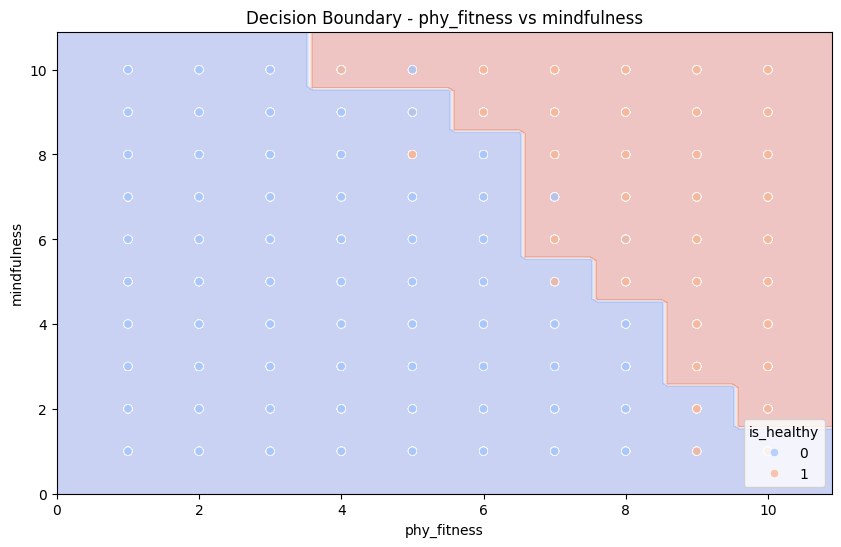

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Select only phy_fitness and mindfulness for visualization and training
features = ['phy_fitness', 'mindfulness']
X_vis = X[features]
X_train_vis, X_test_vis, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train model using only these two features
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vis, y_train)

# Plotting decision boundary
x_min, x_max = X_vis[features[0]].min() - 1, X_vis[features[0]].max() + 1
y_min, y_max = X_vis[features[1]].min() - 1, X_vis[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict across grid
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualization
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_vis[features[0]], y=X_vis[features[1]], hue=y, palette='coolwarm', alpha=0.8)

plt.xlabel('phy_fitness')
plt.ylabel('mindfulness')
plt.title('Decision Boundary - phy_fitness vs mindfulness')
plt.savefig('decision_boundary_plot.png', dpi=300)
plt.show()


In [26]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']